# STARBUCKS CUSTOMER SEGMENTATION PROJECT 

In [92]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [93]:
df=pd.read_csv('Starbucks.csv')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S No.   17000 non-null  int64  
 1   Gender  14825 non-null  object 
 2   Age     17000 non-null  int64  
 3   Income  14825 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 531.4+ KB


In [95]:
df.head()

,S No.,Gender,Age,Income
0,0,NaN,118,NaN
1,1,F,55,112000.0
2,2,NaN,118,NaN
3,3,F,75,100000.0
4,4,NaN,118,NaN


In [96]:
# Checking null values
df.isnull().sum()

S No.        0
Gender    2175
Age          0
Income    2175
dtype: int64

In [97]:
#Removing Null Values
a = df.dropna()
print(a)

       S No.  Gender  Age    Income
1           1      F   55  112000.0
3           3      F   75  100000.0
5           5      M   68   70000.0
8           8      M   65   53000.0
12         12      M   58   51000.0
...       ...    ...  ...       ...
16995   16995      F   45   54000.0
16996   16996      M   61   72000.0
16997   16997      M   49   73000.0
16998   16998      F   83   50000.0
16999   16999      F   62   82000.0

[14825 rows x 4 columns]


In [98]:
# Checking duplicated values
a.drop_duplicates()

,S No.,Gender,Age,Income
1,1,F,55,112000.0
3,3,F,75,100000.0
5,5,M,68,70000.0
8,8,M,65,53000.0
12,12,M,58,51000.0
...,...,...,...,...
16995,16995,F,45,54000.0
16996,16996,M,61,72000.0
16997,16997,M,49,73000.0
16998,16998,F,83,50000.0


In [99]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [100]:
X=a[["Age","Income"]]

Text(0, 0.5, 'Count')

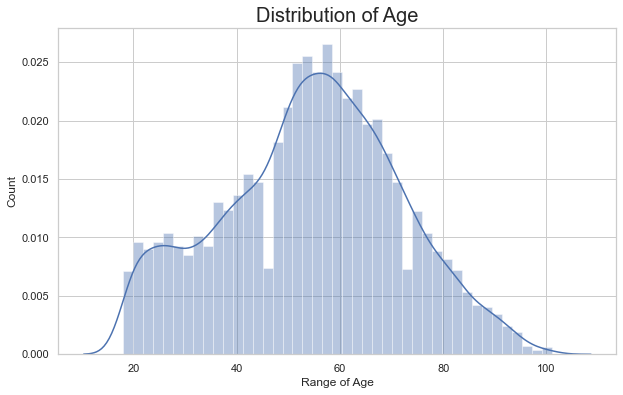

In [101]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(a['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age') 
plt.ylabel('Count')

In [102]:
#We take just the Income and Age
df1=a[["Gender","Age","Income"]]
X=df1[["Age","Income"]]

In [103]:
#The input data
X.head()

,Age,Income
1,55,112000.0
3,75,100000.0
5,68,70000.0
8,65,53000.0
12,58,51000.0


In [104]:
# X['age_group'] = pd.cut(X['Age'], bins=[0, 18, 25, 35, 45, 55, 65, float('Inf')], labels=['Group1','Group2', 'Group3', 'Group4', 'Group5', 'Group6', 'Group7'])

In [105]:
X

,Age,Income
1,55,112000.0
3,75,100000.0
5,68,70000.0
8,65,53000.0
12,58,51000.0
...,...,...
16995,45,54000.0
16996,61,72000.0
16997,49,73000.0
16998,83,50000.0


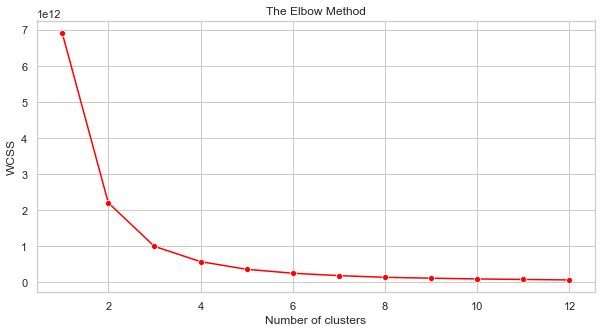

In [106]:
wcss = [] # intializing the list for the values of WCSS (Within-Cluster Sum of Square)
K = range(1, 13) # initializing the loop value from 1 to 10

for i in K:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
# plt.plot(range(1, 11), wcss)
sns.lineplot(range(1, 13), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [112]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [113]:
y_kmeans

array([4, 1, 2, ..., 2, 0, 1])

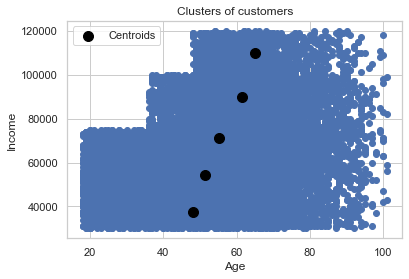

In [114]:
# plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
# plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x=df['Age'],y=df['Income'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()